<h1 align="center"> CSEN 1022 Assignment Submission </h1> 

## Please don't forget to fill in this data
Member 1 Name:

Member 1 ID:

Member 1 Tutorial:

Member 2 Name:

Member 2 ID:

Member 2 Tutorial:

## Imports (Don't Edit)

In [1]:
# ONLY USE THESE IMPORTS.
# PLEASE DON'T EDIT THIS CELL
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Read Data (Don't Edit)

In [2]:
# Read Training Images, Testing Images, Training Labels, Testing Labels
train = np.array([plt.imread('Train/'+str(i)+'.jpg').reshape(-1) for i in range (1,2401)])
test = np.array([plt.imread('Test/'+str(i)+'.jpg').reshape(-1) for i in range (1,201)])
train_labels = np.loadtxt('Train/Training Labels.txt')
test_labels = np.loadtxt('Test/Test Labels.txt')
print(train.shape, test.shape)
print(train_labels.shape,test_labels.shape)

(2400, 784) (200, 784)
(2400,) (200,)


## Quantize Images

In [3]:
def quantize_image(img, bits):
    size = 256/bits
    #return img/255
    return np.digitize(img, [size*i for i in range(1, bits)], right=True)

In [4]:
quantize_image(np.array([64, 129, 0, 255]), 2)

array([0, 1, 0, 1])

In [5]:
quantize_image(np.array([64, 65, 129, 255]), 4)

array([0, 1, 2, 3])

In [6]:
quantize_image(train[0], 2)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,

## Compute Naive Bayes

In [7]:
def train_model(quantization_level = 2):
    mean = np.zeros((10,784))
    mean2 = np.zeros((10,784))
    variance = np.zeros((10,784))
    variance2 = np.zeros((10,784))
    for y in range(0, 10):
        imgs_c1 = quantize_image(train[train_labels == y], quantization_level)
        imgs_c2 = quantize_image(train[train_labels != y], quantization_level)
        for x in range(0, 784):
            values_col_c1 = imgs_c1[:, x]
            values_col_c2 = imgs_c2[:, x]
            mean[y][x] = np.mean(values_col_c1)
            mean2[y][x]= np.mean(values_col_c2)
            variance[y][x] = np.var(values_col_c1)
            variance2[y][x] = np.var(values_col_c2)
            # make values of variance 0.01 incase close to 0
            if(variance[y][x]<0.01):
                variance[y][x]=0.01
            if(variance2[y][x]<0.01):
                variance2[y][x]=0.01
    return {
        "mean1": mean,
        "mean2": mean2,
        "vr1": variance,
        "vr2": variance2
    }

In [8]:
values = train_model()
values

{'mean1': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'mean2': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'vr1': array([[0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        ...,
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01]]),
 'vr2': array([[0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.0

In [9]:
def predict_test(quantization_level = 2, adjust_prob = False):
    values = train_model(quantization_level)
    mean1 = values['mean1']
    mean2 = values['mean2']
    variance1 = values['vr1']
    variance2 = values['vr2']
    gaussian = np.zeros(784)
    probability=np.zeros([200,10])
    for x in range(0, 200):
        quantized_img = quantize_image(test[x], quantization_level)
        for i in range(10):
            gaussian=((1/np.sqrt(2*np.pi*variance1[i]))*(np.e**(-((quantized_img-mean1[i])**2)/(2*variance1[i]))))
            gaussian2=((1/np.sqrt(2*np.pi*variance2[i]))*(np.e**(-((quantized_img-mean2[i])**2)/(2*variance2[i]))))
            probability[x][i]=(np.prod(gaussian)*1/10)/(np.prod(gaussian2)*9/10)
            if adjust_prob and probability[x-1][i] == 0:
                probability[x][i]=0.00001
    predictions=np.empty(200)
    for i_i in range(200):
        max = -1
        index = 0
        for i_c in range(10):
            if(probability[i_i][i_c] > max):
                max = probability[i_i][i_c]
                index=i_c
        predictions[i_i] = index
    cm = np.zeros((10, 10), dtype=int)
    for i in range (0,200):
        cm[int(test_labels[i])][int(predictions[i])] += 1
    return cm, np.sum(cm.diagonal())/200

In [10]:
#test run
predict_test(2)

/home/qwenzo/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


(array([[18,  0,  0,  0,  0,  0,  1,  0,  1,  0],
        [ 0, 20,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0, 16,  0,  0,  0,  2,  0,  1,  1],
        [ 0,  0,  0, 17,  0,  0,  0,  0,  3,  0],
        [ 0,  0,  0,  0,  8,  0,  7,  0,  1,  4],
        [ 0,  0,  1,  0,  1, 11,  0,  0,  6,  1],
        [ 1,  0,  0,  0,  0,  0, 18,  0,  1,  0],
        [ 0,  0,  0,  0,  3,  0,  0, 14,  0,  3],
        [ 1,  0,  0,  0,  0,  0,  0,  0, 17,  2],
        [ 1,  0,  0,  1,  3,  0,  0,  2,  1, 12]]), 0.755)

In [11]:
# Make sure you return these two lists
final_vals = [predict_test(2**level) for level in range(1, 9)]
list_of_confusion_matrices, list_of_accuracies = zip(*final_vals)

<ipython-input-9-af77b380cee6>:14: RuntimeWarning: divide by zero encountered in double_scalars
  probability[x][i]=(np.prod(gaussian)*1/10)/(np.prod(gaussian2)*9/10)
<ipython-input-9-af77b380cee6>:14: RuntimeWarning: invalid value encountered in double_scalars
  probability[x][i]=(np.prod(gaussian)*1/10)/(np.prod(gaussian2)*9/10)
<ipython-input-9-af77b380cee6>:14: RuntimeWarning: overflow encountered in double_scalars
  probability[x][i]=(np.prod(gaussian)*1/10)/(np.prod(gaussian2)*9/10)


In [12]:
print(final_vals)

[(array([[18,  0,  0,  0,  0,  0,  1,  0,  1,  0],
       [ 0, 20,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 16,  0,  0,  0,  2,  0,  1,  1],
       [ 0,  0,  0, 17,  0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  8,  0,  7,  0,  1,  4],
       [ 0,  0,  1,  0,  1, 11,  0,  0,  6,  1],
       [ 1,  0,  0,  0,  0,  0, 18,  0,  1,  0],
       [ 0,  0,  0,  0,  3,  0,  0, 14,  0,  3],
       [ 1,  0,  0,  0,  0,  0,  0,  0, 17,  2],
       [ 1,  0,  0,  1,  3,  0,  0,  2,  1, 12]]), 0.755), (array([[18,  0,  0,  0,  0,  0,  1,  0,  1,  0],
       [ 0, 20,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0, 13,  0,  0,  1,  2,  0,  2,  1],
       [ 0,  0,  1, 14,  1,  1,  0,  0,  3,  0],
       [ 1,  0,  0,  0,  7,  0,  6,  0,  2,  4],
       [ 0,  1,  0,  0,  1,  8,  1,  0,  7,  2],
       [ 1,  1,  1,  0,  0,  0, 16,  0,  1,  0],
       [ 0,  0,  0,  0,  2,  0,  0, 15,  0,  3],
       [ 1,  1,  0,  0,  0,  1,  0,  0, 15,  2],
       [ 0,  0,  0,  1,  3,  0,  0,  6,  1,  9]]), 0.675

## Plot confusion matrices and accuracy for each quantization level (Don't edit)

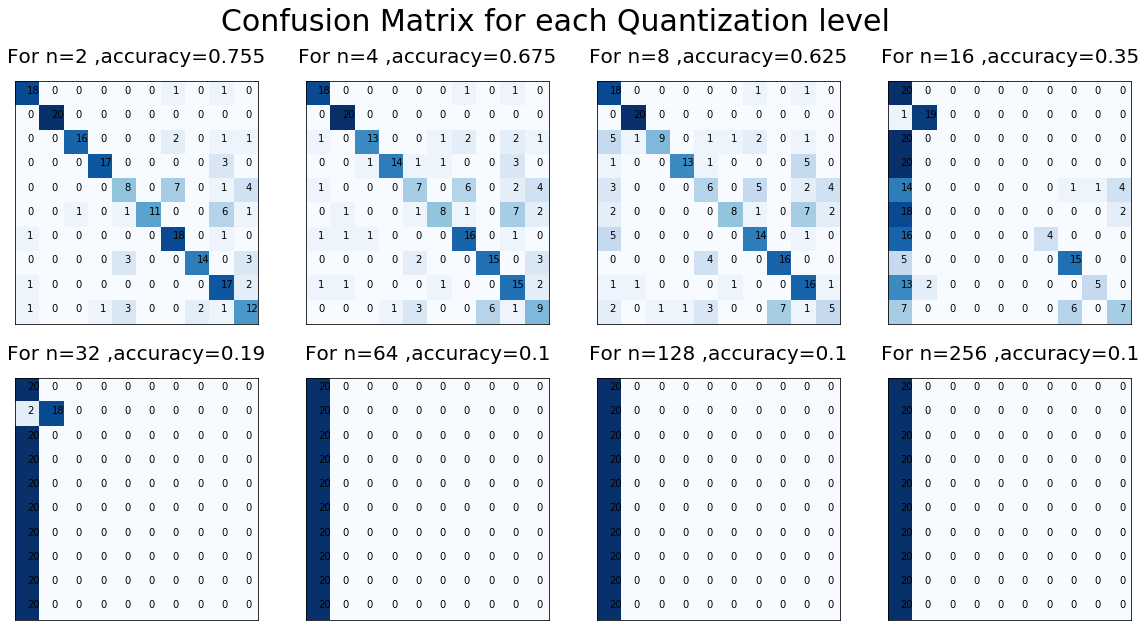

In [13]:
# PLEASE DON'T EDIT THIS CELL
bits = [2,4,8,16,32,64,128,256]
confusion_matrices = list_of_confusion_matrices
accuracies = list_of_accuracies

fig, axs = plt.subplots(2, 4,figsize=(20,10))
fig.suptitle("Confusion Matrix for each Quantization level",fontsize=30)
for pi in range(0,axs.shape[0]):
    for pj in range(0,axs.shape[1]):
        index = np.round(pi*4+pj)
        cm = confusion_matrices[index]
        axs[pi,pj].matshow(cm,cmap="Blues")
        for i in range(0,cm.shape[0]):
            for j in range(0,cm.shape[1]):
                axs[pi,pj].set_xticks([])
                axs[pi,pj].set_yticks([])
                axs[pi,pj].annotate(cm[i,j],(j,i))
                axs[pi,pj].set_title("For n="+str(bits[index])+" ,accuracy="+str(accuracies[index]),fontsize=20)

## Plot accuracy levels for each quantization level (Don't edit)

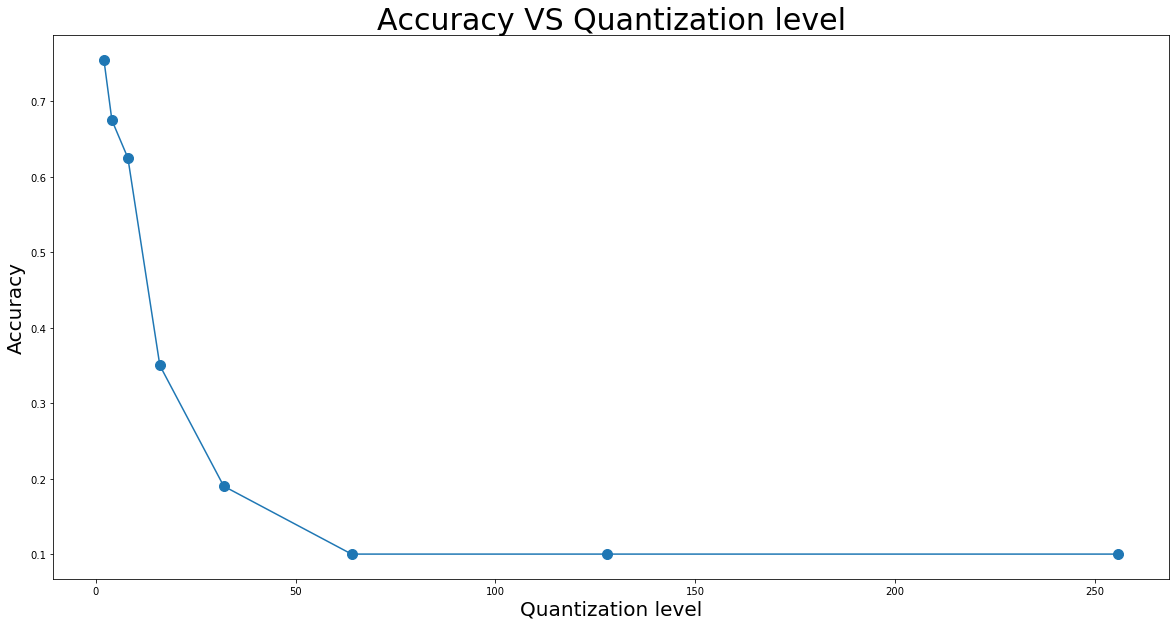

In [14]:
# PLEASE DON'T EDIT THIS CELL
plt.rc('figure', figsize=[20,10])
plt.title("Accuracy VS Quantization level",fontsize=30)
plt.xlabel("Quantization level",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.plot(bits,accuracies,marker='o',markersize=10)

---

## Compute Naive Bayes (replace probabilities of 0 with value in assignment)

In [15]:
# Make sure you return these two lists
final_vals = [predict_test(2**level, adjust_prob = True) for level in range(1, 9)]
list_of_confusion_matrices, list_of_accuracies = zip(*final_vals)

<ipython-input-9-af77b380cee6>:14: RuntimeWarning: divide by zero encountered in double_scalars
  probability[x][i]=(np.prod(gaussian)*1/10)/(np.prod(gaussian2)*9/10)
<ipython-input-9-af77b380cee6>:14: RuntimeWarning: invalid value encountered in double_scalars
  probability[x][i]=(np.prod(gaussian)*1/10)/(np.prod(gaussian2)*9/10)
<ipython-input-9-af77b380cee6>:14: RuntimeWarning: overflow encountered in double_scalars
  probability[x][i]=(np.prod(gaussian)*1/10)/(np.prod(gaussian2)*9/10)


## Plot confusion matrices and accuracy for each quantization level (Don't edit)

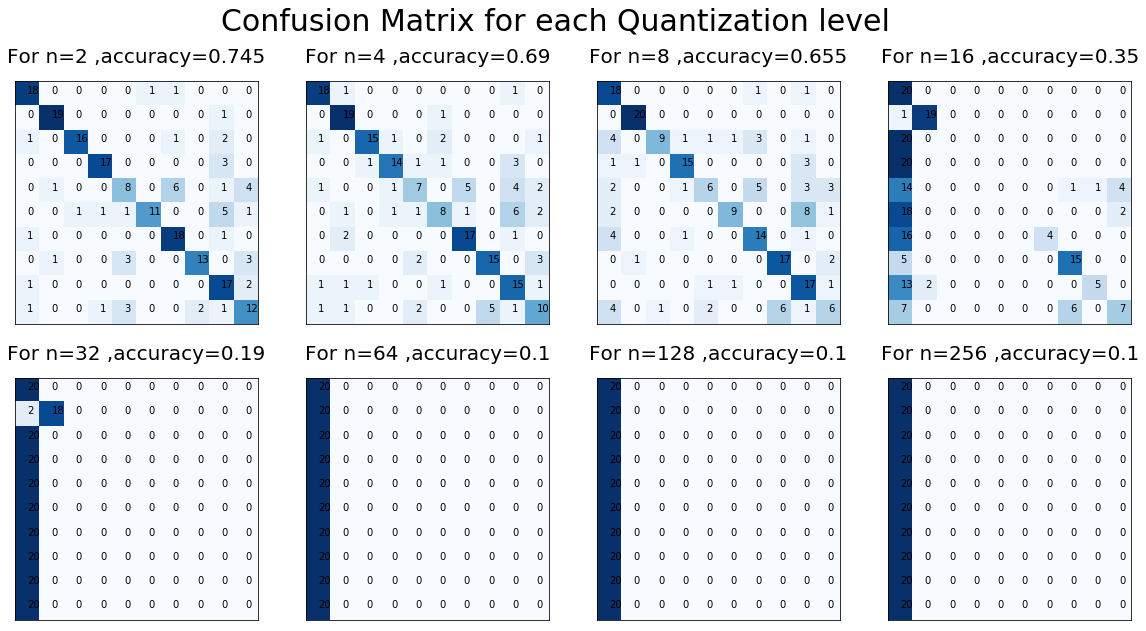

In [16]:
# PLEASE DON'T EDIT THIS CELL
bits = [2,4,8,16,32,64,128,256]
confusion_matrices = list_of_confusion_matrices
accuracies = list_of_accuracies

fig, axs = plt.subplots(2, 4,figsize=(20,10))
fig.suptitle("Confusion Matrix for each Quantization level",fontsize=30)
for pi in range(0,axs.shape[0]):
    for pj in range(0,axs.shape[1]):
        index = np.round(pi*4+pj)
        cm = confusion_matrices[index]
        axs[pi,pj].matshow(cm,cmap="Blues")
        for i in range(0,cm.shape[0]):
            for j in range(0,cm.shape[1]):
                axs[pi,pj].set_xticks([])
                axs[pi,pj].set_yticks([])
                axs[pi,pj].annotate(cm[i,j],(j,i))
                axs[pi,pj].set_title("For n="+str(bits[index])+" ,accuracy="+str(accuracies[index]),fontsize=20)

## Plot accuracy levels for each quantization level (Don't edit)

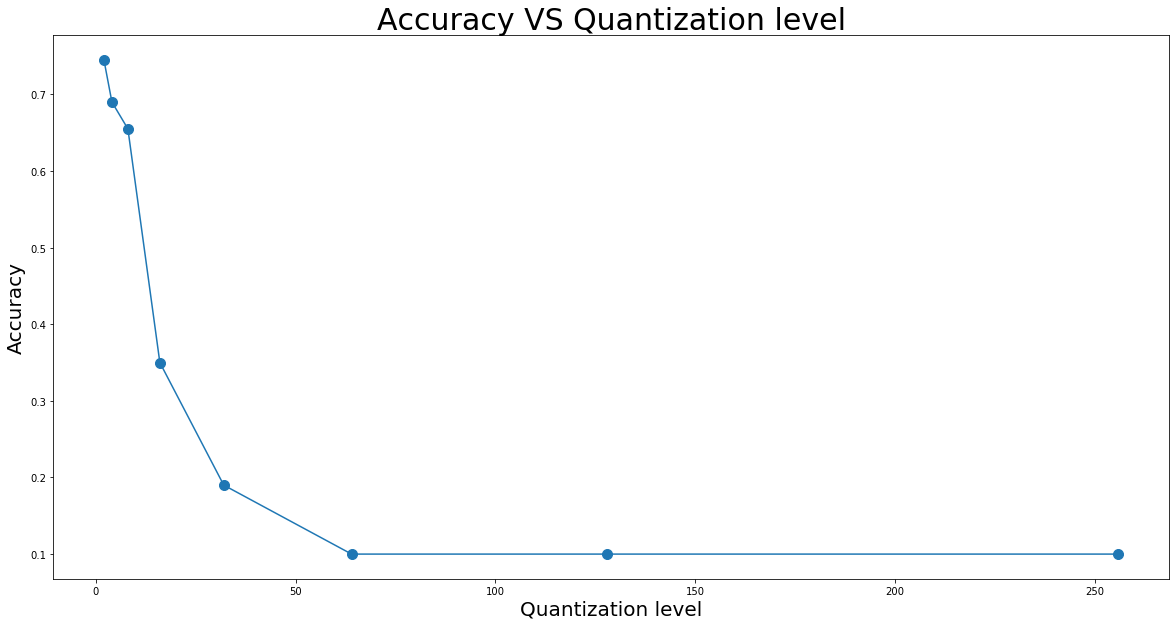

In [17]:
# PLEASE DON'T EDIT THIS CELL
plt.rc('figure', figsize=[20,10])
plt.title("Accuracy VS Quantization level",fontsize=30)
plt.xlabel("Quantization level",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.plot(bits,accuracies,marker='o',markersize=10)